Bubble Sort
-------------
## Algorithms and Programming Languages Exam: Problem 2
### Nick Creel - Apr 13, 2020 - MIT License

implementation and analysis of bubble sort algorithm, meant to partially answer the following question:


    Implement, numerically test, and explain two different sorting
    algorithms with different O() behaviors on randomly chosen
    lists of numbers with various sizes n. Use two different
    programming languages and coding styles. Show graphically
    that the expecected performance is consistent with your
    numerical experiments.
    
according to [Wikipedia](https://en.wikipedia.org/wiki/Bubble_sort), the bubble sort algorithm is commonly defined as follows:


    Bubble sort, sometimes referred to as sinking sort, is a
    simple sorting algorithm that repeatedly steps through
    the list, compares adjacent elements and swaps them if
    they are in the wrong order. The pass through the list is
    repeated until the list is sorted. The algorithm, which
    is a comparison sort, is named for the way smaller or 
    larger elements "bubble" to the top of the list.

When writing this code, I consulted the pseudocode and description of the bubble sort in the Wikipedia article. I also consulted my notes on my final project for the Algorithms course I took in 2017 when creating the plots. 


In [6]:
import numpy as np
from numpy import *
from random import randint
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# helper functions

def generateNLenList(n):
	"""
	this function takes an integer as input and returns a list of randomly
	generated numbers where the length of the list is equal to the value of the integer
	passed as an argument.

	>>> myList = generateNLenList(10)
	>>> len(myList)
	10

	"""
	randList = []
	for i in range(n):
		randList.append(randint(0,1000)) # large range more likely to be unsorted
	return randList

def makeLists(n, m):
	"""
	this function takes two integers, n and m, as input and returns a list of lists.
	n is the number of values in each individual list, and m is the number of lists
	nested within the larger list.

	>>> myLists = makeLists(3,5)
	>>> len(myLists)
	5
	>>> len(myLists[0])
	3
	"""
	listsList = []
	for i in range(0, m):
		listsList.append(generateNLenList(n))
	return listsList

In [3]:
## bubblesort function

def bubbleSort(intList):
	"""
	this function takes a list of integers as input and returns a tuple
	where the first element of the tuple is the list sorted from least to
	greatest, and the second element of the list is the runtime from start
	to end in seconds.

	>>> myList = [3,2,1]
	>>> bubbleSort(myList)[0]
	[1, 2, 3]
	"""
	startTime = time.time()
	isSorted = False
	sortedList = intList
	while isSorted == False:
		swap = False # if we go through the whole list with no swaps,
					 # then the list is sorted.
		for i in range(0, len(sortedList)-1):
			if sortedList[i] > sortedList[i+1]:
				swap = True
				temp = sortedList[i]
				sortedList[i] = sortedList[i+1]
				sortedList[i+1] = temp # now sortedList[i] < sortedList[i+1]
			else:
				continue
		if swap == False:
			isSorted = True
	endTime = time.time()
	runtime = endTime - startTime
	return (sortedList, runtime)

Analysis
========

According to Wikipedia, the O() behavior for the bubble sort algorithm is O(n<sup>2</sup>). To test whether or not my implementation of the bubble sort conforms to this expectation, I use the runtimes generated in the widget below to create a graph and estimate a line of best fit. However, before I perform this analysis, I will also explain why this sorting algorithm falls under O(n<sup>2</sup>).

Consider the case of a reverse sorted list; rather than being sorted from least to greatest, this list would be sorted from greatest to least. In this case, both the first and last element would be the elements which would have to be swapped the most times, with every other element needing to be swapped the less and less, with the median value being the value that moves the least. So, the first element would be swapped with the second, then third, then fourth, on and on until it's finally reached the last index. Just considering this element alone, the bubble sort algorithm must traverse the length of the list n times, and then make n swaps during each traversal. Therefore, the sorting algorithm requires up to n * n steps to complete.

To confirm this, I created 80 lists of various lengths between 10 and 30,000. Each list was then sorted with bubble sort and the runtime in seconds was calculated for that sort. Once I had this data, I created two plots, one with lin-y and log-x scales, and one with log-y and log-x scales. To find the line of best fit, I simply created an equation equal to n<sup>2</sup> and modified the constant until the line fit the data I collected. 

In [5]:
## run bubble sort and get runtimes
runtimes = []
# make a lot of lists of various lengths!
list10s = makeLists(10,10)
list30s = makeLists(30,10)
list100s = makeLists(100,10)
list300s = makeLists(300,10)
list1000s = makeLists(1000,10)
list3000s = makeLists(3000, 10)
list10000s = makeLists(10000,10)
list30000s = makeLists(30000,10)

allLists = [list10s, list30s, list100s, list300s, list1000s, list3000s,
			list10000s, list30000s]
sizes=[10,30,100,300,1000,3000,10000,30000]
count=0
for lists in allLists:
	runtime = []
	for aList in lists:
		runtime.append(bubbleSort(aList)[1])
	runtimes.append((sizes[count], runtime))
	count += 1

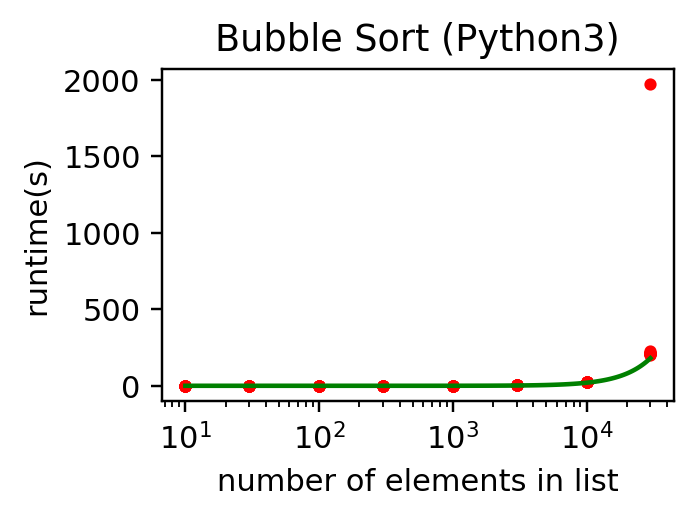

In [18]:
	## make the matplotlib plot
	points_x = []
	points_y = []
	x = np.linspace(0,30000,200)
	y = x
	for runs in runtimes:
		for aRun in runs[1]:
			points_x.append(runs[0])
			points_y.append(aRun)
	#print(points_x, '\n', points_y)
	figure = plt.figure(dpi=220, figsize=(3,2))
	axis = figure.add_subplot(111)
	axis.set(xlabel = "number of elements in list", ylabel = "runtime(s)",
			 title="Bubble Sort (Python3)")
	axis.plot(points_x, points_y, marker = ".", color = "red", linestyle = "none")

	plt.xscale("log") # log scale is more appropriate here, big numbers...
	plt.yscale("linear")

	fit_x = linspace(10, 30000)
	fit_y = (0.0000002)*(fit_x)**2 # this is the line of best fit!
	axis.plot(fit_x, fit_y, color="green")

	plt.show()

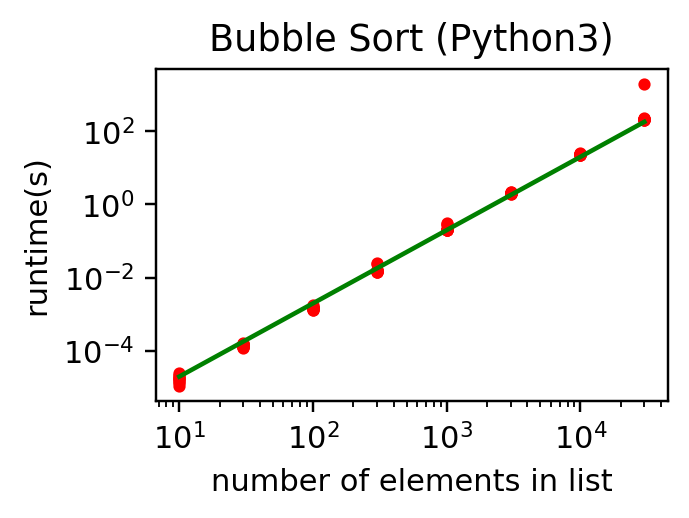

In [21]:
logfigure = plt.figure(dpi=220, figsize=(3,2))
logaxis = logfigure.add_subplot(111)
logaxis.set(xlabel = "number of elements in list", ylabel = "runtime(s)",
		 title="Bubble Sort (Python3)")
logaxis.plot(points_x, points_y, marker = ".", color = "red", linestyle = "none")

plt.xscale("log") # log scale is more appropriate here
plt.yscale("log") # easier to see trend

logaxis.plot(fit_x, fit_y, color="green")

plt.show()

With both of these plots, we can see that the expected behavior of O(n<sup>2</sup>) was replicated by my implementation. While there are a few outliers at both extremes, all values on average fit the trend line 2 x 10<sup>-7</sup>n<sup>2</sup>.